In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128),
    Activation('relu'),

    Dense(10),
    Activation('softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Normalize the images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# Train the model
epochs = 10
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))

# Save the trained model
model.save('saved_models/keras_cifar10_trained_model.h5')
print("Model trained and saved.")

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.3035 - loss: 1.9793 - val_accuracy: 0.4504 - val_loss: 1.5732
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.4544 - loss: 1.5357 - val_accuracy: 0.4985 - val_loss: 1.4194
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.5087 - loss: 1.3909 - val_accuracy: 0.5348 - val_loss: 1.3225
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 43ms/step - accuracy: 0.5428 - loss: 1.3010 - val_accuracy: 0.5454 - val_loss: 1.2851
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.5702 - loss: 1.2396 - val_accuracy: 0.5573 - val_loss: 1.2886
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.5881 - loss: 1.1830 - val_accuracy: 0.5919 - val_loss: 1.1835
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.6042 - loss: 1.1383 - val_accuracy: 0.5976 - val_loss: 1.1521
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.6208 -

Model trained and saved.
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6232 - loss: 1.0835
Test loss: 1.0924592018127441
Test accuracy: 0.620199978351593


In [ ]:
# Class labels for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Load and prepare the image for prediction
def load_and_prepare_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [ ]:
# Path to user-uploaded image
img_path = '/content/sample_data/porsche.jpg'  # Replace with the path to your image

# Load and preprocess the image
img = load_and_prepare_image(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


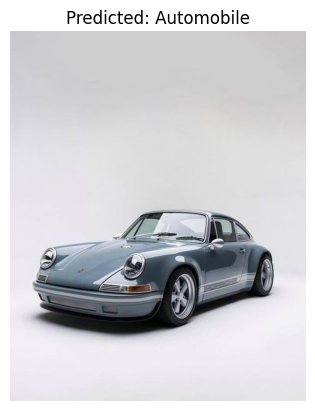

Model prediction: Automobile


In [ ]:
# Predict using the trained model
predictions = model.predict(img)
predicted_class = np.argmax(predictions)

# Display the result
plt.imshow(image.load_img(img_path))
plt.title(f'Predicted: {class_names[predicted_class]}')
plt.axis('off')
plt.show()

print(f"Model prediction: {class_names[predicted_class]}")
